#Project : Bank Churn Machine Learning Case Study

#EXPOLATORY DATA ANALYSIS (EDA)

In [132]:
#Importing Basic Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [133]:
#To get the dataset from CSV file

df=pd.read_csv('/content/sample_data/Churn_Modelling.csv')

#To show the starting first 5 data 

df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [134]:
#To check total no. of data (rows,columns) in the dataset 

df.shape

(10000, 14)

In [135]:
#But here 'RowNumber', 'CustomerID' , 'Surname' are unwanted columns so delete them 
# Remove three columns as index base

df.drop(df.columns[[0, 1, 2]], axis = 1, inplace = True)

#To show the starting first 5 data 

df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [136]:
#To check total no. of data (rows,columns) in the dataset 

df.shape

(10000, 11)

In [137]:
#To check for Null values in dataset

df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [138]:
#To recheck for Null values

df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [139]:
#Check Unique values in 'Geography' column

df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [140]:
#Check Unique values in 'Gender' column

df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

NOTE: Here Object type data also not contain null values so we can say that the given data doesn't contain Null Values 

In [141]:
#Check for whether data is balanced or Imbalanced

df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

0    ----------->    Not Exited

1    ------------>   Yes Exited

We will need to balanced the data before giving to Machine Learning Algorithm because it will affect the accuracy of the model.
After scaling we will balanced the data.

In [142]:
#Separate object type data and numeric type data from dataset df

df_num=df.select_dtypes(('float64','int64'))    #Numeric type data  
df_cat=df.select_dtypes('object')             #Object type data

In [143]:
df_cat.dtypes

Geography    object
Gender       object
dtype: object

In [144]:
df_num.dtypes

CreditScore          int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [145]:
#Apply LableEncoder for converts object type data into numeric type

from sklearn.preprocessing import LabelEncoder
column=df_cat.columns
print(column)

for col in column:
    #Create object of LabelEncoder class
    le=LabelEncoder()
    df_cat[col]=le.fit_transform(df_cat[col])

Index(['Geography', 'Gender'], dtype='object')


In [146]:
df_cat.head()

,Geography,Gender
0,0,0
1,2,0
2,0,0
3,0,0
4,2,0


In [147]:
#To join both dataset df_num and df_cat and hold on new datafrome df_new

df_new=pd.concat([df_num,df_cat],axis=1)

#To show the starting first 5 data 

df_new.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography,Gender
0,619,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,2,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,2,0


#DATA VISUALIZATION

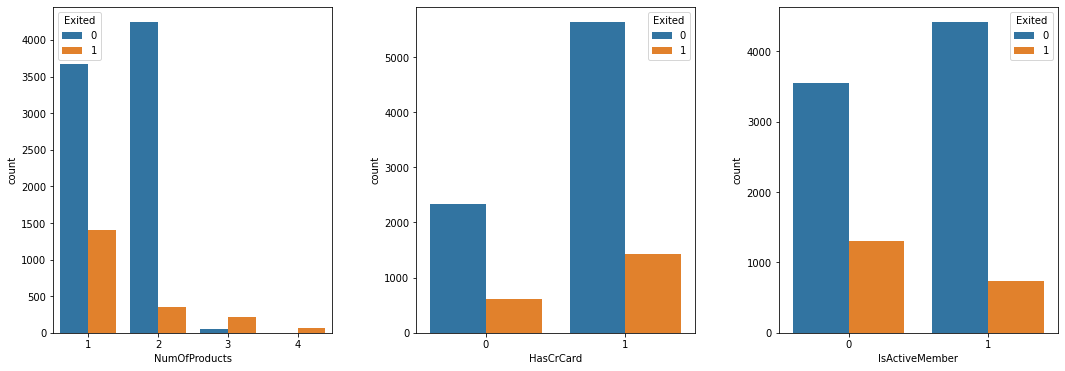

In [148]:
_, ax = plt.subplots(1, 3, figsize=(18, 6))
plt.subplots_adjust(wspace=0.3)
sns.countplot(x = "NumOfProducts", hue="Exited", data = df, ax= ax[0])
sns.countplot(x = "HasCrCard", hue="Exited", data = df, ax = ax[1])
sns.countplot(x = "IsActiveMember", hue="Exited", data = df, ax = ax[2])

Customer with 3 or 4 products are higher chances to Churn (Exit)


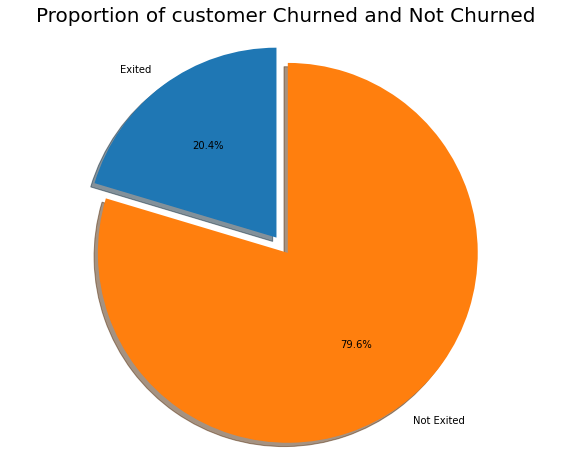

In [149]:
labels = 'Exited', 'Not Exited'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer Churned and Not Churned", size = 20)
plt.show()

So about 20% of the customers have churned. So the baseline model could be to predict that 20% of the customers will churn.

#SELECT INPUT(X) AND OUTPUT(Y) , TRAIN TEST SPLITING ,SCALING (StandardScaler), CREATING def FUNCTION FOR ALGORITHMS 

In [150]:
#Select input and output from dataset

X=df_new.drop("Exited",axis=1)    #input

Y=df_new['Exited']         #output

In [151]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography,Gender
0,619,42,2,0.00,1,1,1,101348.88,0,0
1,608,41,1,83807.86,1,0,1,112542.58,2,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0
4,850,43,2,125510.82,1,1,1,79084.10,2,0


In [152]:
Y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [153]:
#train test split
 
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [154]:
#Scaling 
from sklearn.preprocessing import StandardScaler
#create the object of StandardScaler class
ss=StandardScaler()
X_train=ss.fit_transform(X_train)             #fit is used to train the model 
X_test=ss.transform(X_test)                   

In [155]:
#Create user defined function

def create_model(model): #Here model passing argument(object)

    model.fit(X_train,Y_train)  #Train the model with 70% data
    
    Y_pred=model.predict(X_test)   #Test the model with 30% data
    
    print(classification_report(Y_test,Y_pred))  #To generate Classification report 
    print(confusion_matrix(Y_test,Y_pred))       #To generate Confusion matrix
    
    return model

In [156]:
from sklearn.metrics import classification_report,confusion_matrix

In [157]:
#Previously we have find that the data is imbalanced so we will need to balanced it before giving to Machine Leraning Model. 
#For Balancing the data we need to apply Sampling Technnique

#We will apply RandomOverSampler which is a type of Sampling Technique  
#RandomOverSampler : inbuilt class : to increase means create duplicate records of minority class which equal to majority class

from imblearn.over_sampling import RandomOverSampler

In [158]:
#before apply randomoversampler
Y_train.value_counts() #check if not balance

0    5590
1    1410
Name: Exited, dtype: int64

In [159]:
#Apply RandomOverSampler
#First create the object of class RandomOverSampler
ros=RandomOverSampler()

In [160]:
X_train,Y_train=ros.fit_resample(X_train,Y_train)
#here make a duplicate record from existing record of minority class

In [161]:
#Before apply randomoversample, check testing data
Y_test.value_counts()

0    2373
1     627
Name: Exited, dtype: int64

In [162]:
X_test,Y_test=ros.fit_resample(X_test,Y_test)           #fit_resample() inbuilt method of RandomOversample class

In [163]:
#After apply randomversample , check testing data
Y_test.value_counts()

0    2373
1    2373
Name: Exited, dtype: int64

In [164]:
#Here data is balanced now so we can give our data to Machine Learning Algorithms

#LOGISTIC REGRESSION

In [165]:
#Create a baseline model : logistic Regression 
from sklearn.linear_model import LogisticRegression

In [166]:
#Create object of class LogisticRegression
lr=LogisticRegression()

In [167]:
#Call function
lr=create_model(lr)  

              precision    recall  f1-score   support

           0       0.68      0.72      0.70      2373
           1       0.70      0.66      0.68      2373

    accuracy                           0.69      4746
   macro avg       0.69      0.69      0.69      4746
weighted avg       0.69      0.69      0.69      4746

[[1714  659]
 [ 802 1571]]


NOTE: Here LogisticRegression Algorithm gives about 0.69 Accuracy score.
But here in this case we have to focus on recall score, here recall score of Class 0 is 0.72 and recall score of Class 1 is 0.66.

Lets, test the data with other models(Algorithms). 

#DECISION TREE CLASSIFIER


In [168]:
#Now perform dataset with the help of DecisionTreeClassifier
#Call DecisionTreeClassifier class

from sklearn.tree import DecisionTreeClassifier

In [169]:
#Create a object of class DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [170]:
#call function
dt=create_model(dt)

              precision    recall  f1-score   support

           0       0.64      0.87      0.74      2373
           1       0.79      0.50      0.62      2373

    accuracy                           0.69      4746
   macro avg       0.72      0.69      0.68      4746
weighted avg       0.72      0.69      0.68      4746

[[2065  308]
 [1179 1194]]


In [171]:
#Here clearly understood that the model is overfit ,so reduced the overfitting situation we use pruning technique 

#How to reduced a overfitting situation By using the Pruning technique There are 2 types of pruning technique : -

#1. max_depth : inbulit parameter

#2. min_samples_leaf  : inbuilt parameter

In [172]:
#1.max_depth parameter
#Create object of DecisionTreeClassifier class and pass the parameter
#max_depth
dt1=DecisionTreeClassifier(max_depth=5,random_state=1)
#by default use inbuilt method gini index

In [173]:
#Call function
dt1=create_model(dt1)

              precision    recall  f1-score   support

           0       0.71      0.82      0.76      2373
           1       0.79      0.67      0.72      2373

    accuracy                           0.75      4746
   macro avg       0.75      0.75      0.74      4746
weighted avg       0.75      0.75      0.74      4746

[[1942  431]
 [ 779 1594]]


In [174]:
#Use second pruning tech . 
#min_samples_leaf : Atleast 45-50 or more 

##create object of DecisionTreeClassifier class
dt2=DecisionTreeClassifier(min_samples_leaf=50) #by default Gini index method 
#min_samples_leaf =50 or more means not less than=45-50

In [175]:
#Call function
dt2=create_model(dt2)

              precision    recall  f1-score   support

           0       0.72      0.79      0.75      2373
           1       0.77      0.69      0.73      2373

    accuracy                           0.74      4746
   macro avg       0.74      0.74      0.74      4746
weighted avg       0.74      0.74      0.74      4746

[[1880  493]
 [ 734 1639]]


NOTE: Here DecisionTreeClassifier Algorithm without Pruning technique gives about 0.69 Accuracy score.
But here in this case we have to focus on recall score, here recall score of Class 0 is 0.87 and recall score of Class 1 is 0.50.

Here DecisionTreeClassifier Algorithm with Pruning technique (max_depth parameter) gives about 0.75 Accuracy score.
But here in this case we have to focus on recall score, here recall score of Class 0 is 0.82 and recall score of Class 1 is 0.67.

Here DecisionTreeClassifier Algorithm  with Pruning technique with (min_samples_leaf) gives about 0.74 Accuracy score.
But here in this case we have to focus on recall score, here recall score of Class 0 is 0.79 and recall score of Class 1 is 0.69.


Lets, test the data with other models(Algorithms). 

#RANDOM FOREST CLASSIFIER


In [176]:
#call Random Forest Tree from package

from sklearn.ensemble import RandomForestClassifier
#ensemble means to train the same dataset from multiple alorithm


In [177]:
#create object of RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=10,max_features=10)
#n_estimators inbuilt parameter : no. of decision tree
#max n_estimators can be given<=100
#bydefault method gini index

In [178]:
#Call function
rfc=create_model(rfc)

              precision    recall  f1-score   support

           0       0.65      0.92      0.76      2373
           1       0.87      0.50      0.64      2373

    accuracy                           0.71      4746
   macro avg       0.76      0.71      0.70      4746
weighted avg       0.76      0.71      0.70      4746

[[2190  183]
 [1179 1194]]


NOTE: Here RandomForestClassifier Algorithm gives about 0.71 Accuracy score.
But here in this case we have to focus on recall score, here recall score of Class 0 is 0.92 and recall score of Class 1 is 0.50.

Lets, test the data with other models(Algorithms). 

#BOOSTING TECHNIQUE


Ensembling technique:

1. Random forest tree

2. Boosting technique

 A. ADA Boost : Adaptor Boosting

 B. Gradient Boost
 
 C. Extreme Gradient Boost

In [179]:
#Boosting Trechnique 
#ADA Boost
from sklearn.ensemble import AdaBoostClassifier

In [180]:
ada=AdaBoostClassifier(n_estimators=9,random_state=1)
#n_estimators means no. of decision tree (depend on no. of input features)

In [181]:
#call function 
ada=create_model(ada)

              precision    recall  f1-score   support

           0       0.74      0.81      0.77      2373
           1       0.79      0.72      0.75      2373

    accuracy                           0.76      4746
   macro avg       0.76      0.76      0.76      4746
weighted avg       0.76      0.76      0.76      4746

[[1915  458]
 [ 672 1701]]


In [182]:
#Call GradientBoostingClassifier class from following package
from sklearn.ensemble import GradientBoostingClassifier

In [183]:
#create the object of GradientBoostingClassifier class
gbc=GradientBoostingClassifier(n_estimators=25,random_state=1)
#not can be <= 100     #n_estimators means no. of decision tree (depend on no. of input features)

In [184]:
#call function 
gbc=create_model(gbc)

              precision    recall  f1-score   support

           0       0.75      0.79      0.77      2373
           1       0.78      0.74      0.76      2373

    accuracy                           0.77      4746
   macro avg       0.77      0.77      0.77      4746
weighted avg       0.77      0.77      0.77      4746

[[1882  491]
 [ 615 1758]]


In [185]:
##Call Extreme Gradient Boosting (XGB) class from following package

from xgboost import XGBClassifier

In [207]:
#create object of class XGBClassifier
xgc=XGBClassifier(n_estimators=30,reg_alpha=1)
#reg means regularation : lambda or alpha
#automatic overfitting : reg means regularation and alpha or lambda : 
#hyperparameter
#1 means True

In [208]:
#call function
xgc=create_model(xgc)

              precision    recall  f1-score   support

           0       0.75      0.80      0.78      2373
           1       0.79      0.74      0.76      2373

    accuracy                           0.77      4746
   macro avg       0.77      0.77      0.77      4746
weighted avg       0.77      0.77      0.77      4746

[[1896  477]
 [ 618 1755]]


NOTE: Here ADA Boost Classifier Algorithm gives about 0.76 Accuracy score.
But here in this case we have to focus on recall score, here recall score of Class 0 is 0.81 and recall score of Class 1 is 0.72.

Here Gradient Boost Classifier Algorithm gives about 0.77 Accuracy score.
But here in this case we have to focus on recall score, here recall score of Class 0 is 0.79 and recall score of Class 1 is 0.74.

Here Extreme Gradient Classifier Algorithm gives about 0.77 Accuracy score.
But here in this case we have to focus on recall score, here recall score of Class 0 is 0.80 and recall score of Class 1 is 0.74.


Lets, test the data with other models(Algorithms). 

#K-nn (KNeighborsClassifier) Algorithm:

In [188]:
#Use K-NN Algorithm
from sklearn.neighbors import KNeighborsClassifier 

In [189]:
#Create the object of KNeighborsClassifier  

knc= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2) 

#p=2 means Euclidean distance means sqrt(x2-x1)*2+(y2-y1)*2
#n_neighbors means k means select minimum point (always odd)


In [190]:
#call function
knc=create_model(knc)

              precision    recall  f1-score   support

           0       0.67      0.75      0.71      2373
           1       0.72      0.64      0.67      2373

    accuracy                           0.69      4746
   macro avg       0.70      0.69      0.69      4746
weighted avg       0.70      0.69      0.69      4746

[[1782  591]
 [ 866 1507]]


NOTE: Here KNeighborsClassifier Algorithm gives about 0.69 Accuracy score.
But here in this case we have to focus on recall score, here recall score of Class 0 is 0.75 and recall score of Class 1 is 0.64.

Lets, test the data with other models(Algorithms). 

# Support Vector Machine Algorithm

In [191]:
#Apply Support vector machine 

from sklearn.svm import LinearSVC

In [192]:
#Create object of LinearSVC class
svc=LinearSVC(random_state=1)     #Hard margin by default means to outlier means # No overfit suppose 

In [193]:
#call function
svc=create_model(svc)

              precision    recall  f1-score   support

           0       0.68      0.72      0.70      2373
           1       0.70      0.66      0.68      2373

    accuracy                           0.69      4746
   macro avg       0.69      0.69      0.69      4746
weighted avg       0.69      0.69      0.69      4746

[[1716  657]
 [ 808 1565]]


In [194]:
#Here accuracy is 0.71 which is good but we can more better means can be possible ,model is overfit
#because there can be no error on training time but error on testing time , 
#what do we do , add some external error on training time if create a object of LinearSVC class

#Soft margin means to reduced overfitting situation means some error add on
#training time 
#create object of LinearSVC class
svc1=LinearSVC(random_state=1,C=0.10)#soft margin
#always C means error parameter means to add external error on training time
#with the help of C parameter
#the value of C should be less than 1



In [195]:
#Call function

svc1=create_model(svc1)

              precision    recall  f1-score   support

           0       0.68      0.72      0.70      2373
           1       0.70      0.66      0.68      2373

    accuracy                           0.69      4746
   macro avg       0.69      0.69      0.69      4746
weighted avg       0.69      0.69      0.69      4746

[[1716  657]
 [ 808 1565]]


In [196]:
#Here data is non-linear so by changing the value of "C" above the accuracy not changes.

In [197]:
#if adding external error on training time but no any changes on score
#means given dataset in non-Linear can be possible , dataset is not linear means dataset is non-linear  .
#use Non-linear kernal function of SVM means 2 classes are not separatable with straight line

#There are 3 types of Kernal function of SVM

#1. Linear SVC  : use for linear data

#2. Non-Linear SVC : use for non-linear data

 #A. polynomial kernal function : increase the low dimension to high dimension
 #B. radial basis kernal function


In [198]:
#Kernel function : Converts low dimension data to high dimension data 
#if we have 1 D array then converts 2D array and we have 2D array then to converts 3D array 

#polynomial Kernel function 
#radial basis Kernel function

#both are used for non-linear data


In [199]:
#Give data to Polynomial kernel function , call inbuilt class SVC
from sklearn.svm import SVC
#SVC means support vector classifier

In [200]:
#create object of SVC class
svc=SVC(random_state=1,kernel='poly')

In [201]:
#call function
svc1=create_model(svc1)

              precision    recall  f1-score   support

           0       0.68      0.72      0.70      2373
           1       0.70      0.66      0.68      2373

    accuracy                           0.69      4746
   macro avg       0.69      0.69      0.69      4746
weighted avg       0.69      0.69      0.69      4746

[[1716  657]
 [ 808 1565]]


In [202]:
#Give dataset to radial basis means kernel=rbf
svc2=SVC(random_state=1,kernel='rbf')

In [203]:
#call function
svc2=create_model(svc2)

              precision    recall  f1-score   support

           0       0.74      0.80      0.77      2373
           1       0.78      0.73      0.75      2373

    accuracy                           0.76      4746
   macro avg       0.76      0.76      0.76      4746
weighted avg       0.76      0.76      0.76      4746

[[1887  486]
 [ 650 1723]]


NOTE: Here SupportVectorMachine Algorithm with hard margin gives about 0.69 Accuracy score.
But here in this case we have to focus on recall score, here recall score of Class 0 is 0.72 and recall score of Class 1 is 0.66.

Here SupportVectorMachine Algorithm with soft margin gives about 0.69 Accuracy score.
But here in this case we have to focus on recall score, here recall score of Class 0 is 0.72 and recall score of Class 1 is 0.66.

Here SupportVectorMachine Algorithm with Polynomial kernel function gives about 0.69 Accuracy score.
But here in this case we have to focus on recall score, here recall score of Class 0 is 0.72 and recall score of Class 1 is 0.66.

Here SupportVectorMachine Algorithm with Radial basis Kernel function gives about 0.76 Accuracy score.
But here in this case we have to focus on recall score, here recall score of Class 0 is 0.80 and recall score of Class 1 is 0.73.

Lets, test the data with other models(Algorithms). 

#Naive Bayes Classifier Algorithm

In [204]:
#Apply Navie Bayes Theorem (Classification theorem)
#1. Gaussian Naive Bayes theorem

from sklearn.naive_bayes import GaussianNB
#Inbuilt class GaussianNB

In [205]:
#create the object of class GaussianNB
#GaussianNB algorithm are applied on continuous Numerical value of input column

gnb=GaussianNB()

In [206]:
#call function

gnb=create_model(gnb)

              precision    recall  f1-score   support

           0       0.71      0.78      0.74      2373
           1       0.75      0.68      0.71      2373

    accuracy                           0.73      4746
   macro avg       0.73      0.73      0.73      4746
weighted avg       0.73      0.73      0.73      4746

[[1844  529]
 [ 759 1614]]


NOTE: Here Gaussian Naive Bayes Algorithm gives about 0.73 Accuracy score.
But here in this case we have to focus on recall score, here recall score of Class 0 is 0.78 and recall score of Class 1 is 0.68.


#CONCLUSION : Hence, we will recommend Extreme Gradient Classifier Algorithm for the given Dataset of Bank Churn.